In [3]:
import pandas as pd
from scipy import stats
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data_dir = "/home/ucsd-train25/scratch/projects/haber_atlas_all/processed_files_2/"

# Correlate variance with mean expression

In [22]:
input_file_name = "tpm_all.csv"

tpm = pd.read_csv(data_dir+input_file_name, index_col=0)
print(tpm.shape)
tpm.head()

(15971, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,2.095539,2.128894,1.805554,1.710949,0.0,2.514271,0.0,1.546211,1.996544,0.0,...,2.152732,1.463345,0.0,0.000000,0.0,3.304177,0.0,0.0,3.584004,1.547524
Lypla1,2.095539,0.000000,0.000000,1.095506,0.0,0.000000,0.0,0.000000,0.805381,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.798929,0.0,0.0,0.000000,0.469501
Gm37988,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.909761,0.0,1.624288,0.0,1.310118,0.0,0.0,0.000000,0.469501


In [ ]:
coef_var = np.log10((tpm.std(axis=1)/tpm.mean(axis=1))**2)
coef_var.head()

In [ ]:
means = np.log10(tpm.mean(axis=1))
means.head()

In [ ]:
result = stats.linregress(means, coef_var)
slope = result[0]
y_int = result[1]
result

In [ ]:
var_df = pd.DataFrame([coef_var, means]).T
var_df.rename(columns = {0:'coef_var',1:'mean'}, inplace=True)
var_df['expected'] = var_df['mean']*slope + y_int
var_df.head()

Now let's put all this code in a handy function that we can call later on any file.

In [8]:
def make_var_df(input_csv):
    tpm_df = pd.read_csv(input_csv, index_col=0)
    coef_var = np.log10((tpm_df.std(axis=1)/tpm_df.mean(axis=1))**2)
    means = np.log10(tpm_df.mean(axis=1))
    result = stats.linregress(means, coef_var)
    slope = result[0]
    y_int = result[1]
    var_df = pd.DataFrame([coef_var, means]).T
    var_df.rename(columns = {0:'coef_var',1:'mean'}, inplace=True)
    var_df['expected'] = var_df['mean']*slope + y_int
    
    return var_df

In [9]:
variance = make_var_df(data_dir+"tpm_all.csv")

Plot the results

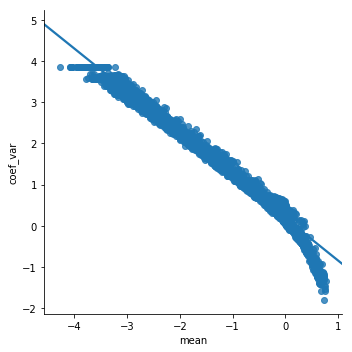

In [10]:
sns.lmplot('mean','coef_var', variance, fit_reg=True)

In [15]:
variance['sig'] = (variance['coef_var'] - variance['expected']) > 0.05
variance.head()

,coef_var,mean,expected,sig
Mrpl15,-0.072158,0.125566,0.056825,False
Lypla1,0.352613,-0.193168,0.384832,False
Gm37988,3.408084,-3.210871,3.490320,False
Tcea1,0.944581,-0.803017,1.012421,False
Atp6v1h,0.886623,-0.670787,0.876345,False


3451


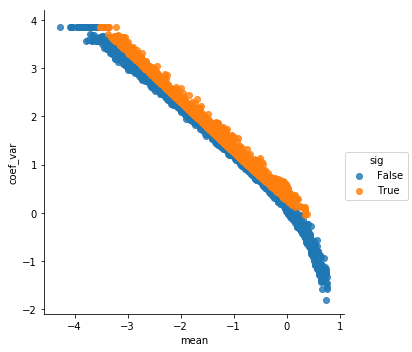

In [16]:
sns.lmplot('mean','coef_var',variance, hue='sig', fit_reg=False)
print(variance['sig'].sum())

In [19]:
genes_to_keep = variance['sig']
genes_to_keep.head()

Mrpl15     False
Lypla1     False
Gm37988    False
Tcea1      False
Atp6v1h    False
Name: sig, dtype: bool

In [24]:
log2_tpm = pd.read_csv(data_dir+"log2_tpm_all.csv", index_col=0)

In [25]:
log2_tpm_vg = log2_tpm.loc[genes_to_keep]
print(log2_tpm_vg.shape)
log2_tpm_vg.head()

(3451, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
St18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Cspp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.106945
Trpa1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Kcnb2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [26]:
def subset_for_variable_genes(var_df, expression, cutoff):
    var_df['sig'] = (var_df['coef_var'] - var_df['expected']) > cutoff
    sns.lmplot('mean','coef_var',var_df, hue='sig', fit_reg=False)
    plt.show()
    print("number sig genes = "+str(var_df['sig'].sum()))
    
    subset = expression.loc[var_df['sig']]
    return subset

In [18]:
log2_tpm = pd.read_csv(data_dir+"log2_tpm_all.csv", index_col=0)

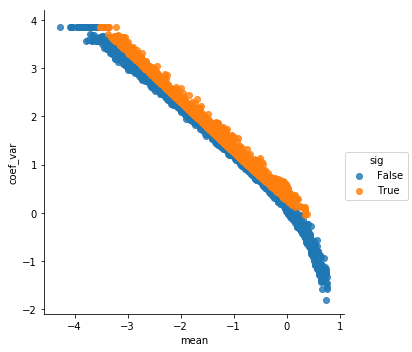

number sig genes = 3451


In [27]:
log2_tpm_vg = subset_for_variable_genes(variance, log2_tpm, 0.05)

In [28]:
log2_tpm_vg.to_csv(data_dir+"log2_tpm_vg_0.05.csv")

## Scale the data 

We modeled the relationship between expression and variance to remove outliers from the extremes of expression levels and identify a confident list of genes that is contributing to the variance across the dataset. Now that we have this list of genes, we want to treat them all equal by centering and scaling their expression values across cells with zscore. 

In [29]:
log2_tpm_vg = pd.read_csv(data_dir+"log2_tpm_vg_0.05.csv", index_col=0)
print(log2_tpm_vg.shape)
log2_tpm_vg.head()

(3451, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
St18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Cspp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.106945
Trpa1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Kcnb2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [30]:
stats.zscore(log2_tpm_vg, axis=1)

array([[-0.1431314 , -0.1431314 , -0.1431314 , ..., -0.1431314 ,
        -0.1431314 , -0.1431314 ],
       [-0.08303673, -0.08303673, -0.08303673, ..., -0.08303673,
        -0.08303673, -0.08303673],
       [-0.28474818, -0.28474818, -0.28474818, ..., -0.28474818,
        -0.28474818,  1.63280494],
       ...,
       [-0.04586653, -0.04586653, -0.04586653, ..., -0.04586653,
        -0.04586653, -0.04586653],
       [-0.27267286, -0.27267286, -0.27267286, ...,  2.4709978 ,
        -0.27267286, -0.27267286],
       [-0.14756384, -0.14756384, -0.14756384, ..., -0.14756384,
        -0.14756384, -0.14756384]])

The output of this is an array, so let's put this back into a dataframe with the appropriate row and column labels.

In [31]:
zscore_array = stats.zscore(log2_tpm_vg, axis=1)

zscore_variable_genes = pd.DataFrame(zscore_array, index = log2_tpm_vg.index)
zscore_variable_genes.columns = log2_tpm_vg.columns
print(zscore_variable_genes.shape)
zscore_variable_genes.head()

(3451, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,...,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131
St18,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,...,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037
Cspp1,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,...,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,1.632805
Trpa1,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,...,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341
Kcnb2,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,...,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957


In [32]:
zscore_variable_genes.sum(axis=1).head()

4732440D04Rik    6.821210e-13
St18            -2.842171e-14
Cspp1            2.188472e-12
Trpa1           -2.131628e-14
Kcnb2           -1.207923e-13
dtype: float64

In [34]:
def zscore_genes(df):
    """
    Calculates the zscore across the rows, this assumes df is oriented with genes on rows and 
    cells on columns
    """
    zscore_array = stats.zscore(df, axis=1)
    df_result = pd.DataFrame(zscore_array, index = df.index)
    df_result.columns = df.columns
    
    return df_result

In [35]:
log2_tpm_vg = pd.read_csv(data_dir+"log2_tpm_vg_0.05.csv", index_col=0)


In [36]:
zscore_res = zscore_genes(log2_tpm_vg)
zscore_res.head()

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,...,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131,-0.143131
St18,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,...,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037,-0.083037
Cspp1,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,...,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,-0.284748,1.632805
Trpa1,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,...,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341,-0.052341
Kcnb2,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,...,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957,-0.067957


In [37]:
zscore_res.to_csv(data_dir+"log2_tpm_vg_0.05_zscore.csv")

## Calculate spearman correlation among columns

In [38]:
zscore_res = pd.read_csv(data_dir+"log2_tpm_vg_0.05_zscore.csv", index_col=0)

In [39]:
ranked = zscore_res.rank(axis=0)
print(ranked.shape)
ranked.head()

(3451, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
4732440D04Rik,1654.0,1625.0,1565.0,1457.0,1598.0,1577.0,1599.0,1572.0,1458.0,1655.0,...,1563.0,1579.0,1711.0,1664.0,1681.0,1549.0,1713.0,1624.0,1686.0,1522.0
St18,2231.0,2196.0,2137.0,1998.0,2171.0,2147.0,2173.0,2148.0,2028.0,2232.0,...,2137.0,2156.0,2292.0,2243.0,2254.0,2124.0,2293.0,2193.0,2265.0,2099.0
Cspp1,511.0,522.0,484.0,420.0,490.0,475.0,490.0,461.0,417.0,505.0,...,464.0,476.0,566.0,536.0,543.0,457.0,575.0,499.0,540.0,3385.0
Trpa1,2552.0,2517.0,2458.0,2312.0,2490.0,2465.0,2495.0,2468.0,2347.0,2553.0,...,2457.0,2480.0,2611.0,2563.0,2574.0,2446.0,2614.0,2516.0,2586.0,2414.0
Kcnb2,2371.0,2336.0,2277.0,2133.0,2309.0,2286.0,2314.0,2288.0,2166.0,2372.0,...,2276.0,2298.0,2430.0,2382.0,2394.0,2265.0,2433.0,2335.0,2405.0,2238.0


In [40]:
ranked['B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal'].max()

3451.0

In [41]:
correlation = ranked.corr()
print(correlation.shape)
correlation.head()

(7216, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1.000000,0.723169,0.678125,0.595578,0.715618,0.685549,0.713497,0.704484,0.579496,0.722245,...,0.607057,0.610291,0.710880,0.698018,0.691339,0.603023,0.708273,0.619375,0.703867,0.533471
B1_AAACCGTGCCAAGT_Tuft,0.723169,1.000000,0.683075,0.551656,0.700421,0.682384,0.695070,0.637126,0.569106,0.678342,...,0.523687,0.565646,0.701156,0.665625,0.677283,0.551953,0.695070,0.622825,0.643763,0.526653
B1_AAACGCACAGCCTA_Goblet,0.678125,0.683075,1.000000,0.557855,0.689257,0.643307,0.648327,0.618016,0.554531,0.637603,...,0.503572,0.520235,0.650378,0.689456,0.609745,0.497996,0.621962,0.550442,0.608886,0.533093
B1_AAACGCACCAGATC_Endocrine,0.595578,0.551656,0.557855,1.000000,0.553284,0.525466,0.529054,0.559558,0.455524,0.563019,...,0.449934,0.462929,0.525636,0.543549,0.502349,0.446872,0.535814,0.462551,0.515280,0.394915
B1_AAACGCACCGCCTT_Stem,0.715618,0.700421,0.689257,0.553284,1.000000,0.675058,0.662698,0.610339,0.584919,0.638887,...,0.514012,0.554222,0.658361,0.663122,0.639705,0.535544,0.639176,0.600845,0.603663,0.519521


In [45]:
def calc_spearman_correlation(df):
    ranked = df.rank(axis=0)
    correlation = ranked.corr()
    return correlation

In [46]:
zscore_res_corr = calc_spearman_correlation(zscore_res)

In [47]:
zscore_res_corr.to_csv(data_dir+"log2_tpm_vg_0.05_zscore_corr.csv")

# Make a clustermap with the results

In [235]:
correlation = pd.read_csv(data_dir+"log2_tpm_vg_0.05_zscore_corr.csv", index_col=0)

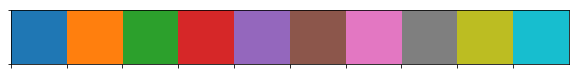

In [236]:
batch_palette = sns.color_palette()
sns.palplot(batch_palette)

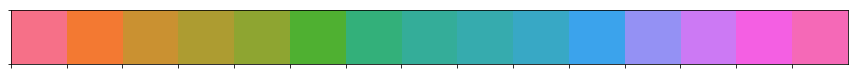

In [237]:
cell_type_palette = sns.color_palette('husl', n_colors = 15)
sns.palplot(cell_type_palette)

In [238]:
import random

cols_to_keep = random.sample(range(len(correlation)), 1000)
cells_subset = correlation.columns[cols_to_keep]
correlation_subset = correlation[cells_subset]
correlation_subset = correlation_subset.T[cells_subset]
print(correlation_subset.shape)

(1000, 1000)


In [257]:
get_batch = correlation_subset.reset_index()
get_batch['batch'] = get_batch['index'].apply(lambda x: x.split("_")[0])

#also get celltype identifier
get_batch['celltype'] = get_batch['index'].apply(lambda x: x.split("_")[2])

get_batch.set_index('index', inplace=True)

In [258]:
batches = get_batch['batch']
celltypes = get_batch['celltype']

In [260]:
batches.head()

index
B8_CGCCTAACCATACG_Enterocyte.Immature.Distal    B8
B8_GAACGGGAGATAGA_Enterocyte.Progenitor.Late    B8
B2_TCGAGAACCCTATT_Stem                          B2
B8_GCAACCCTAACAGA_Stem                          B8
B2_TATGAATGAGTTCG_Stem                          B2
Name: batch, dtype: object

In [242]:
celltypes.unique()

array(['Enterocyte.Immature.Distal', 'Enterocyte.Progenitor.Late', 'Stem',
       'Enterocyte.Progenitor', 'TA.G2', 'Enterocyte.Progenitor.Early',
       'Goblet', 'Tuft', 'Enterocyte.Immature.Proximal', 'Paneth',
       'TA.G1', 'TA.Early', 'Enterocyte.Mature.Proximal', 'Endocrine',
       'Enterocyte.Mature.Distal'], dtype=object)

In [261]:
batch_color_assignment

{'B8': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'B2': (1.0, 0.4980392156862745, 0.054901960784313725),
 'B1': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'B3': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'B9': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'B7': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'B10': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'B6': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'B4': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'B5': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)}

In [243]:
batch_color_assignment = dict(zip(batches.unique(), batch_palette))
batch_colors = batches.map(batch_color_assignment)
batch_colors.head()

index
B8_CGCCTAACCATACG_Enterocyte.Immature.Distal    (0.12156862745098039, 0.4666666666666667, 0.70...
B8_GAACGGGAGATAGA_Enterocyte.Progenitor.Late    (0.12156862745098039, 0.4666666666666667, 0.70...
B2_TCGAGAACCCTATT_Stem                            (1.0, 0.4980392156862745, 0.054901960784313725)
B8_GCAACCCTAACAGA_Stem                          (0.12156862745098039, 0.4666666666666667, 0.70...
B2_TATGAATGAGTTCG_Stem                            (1.0, 0.4980392156862745, 0.054901960784313725)
Name: batch, dtype: object

In [244]:
cell_color_assignment = dict(zip(celltypes.unique(), cell_type_palette))
cell_colors = celltypes.map(cell_color_assignment)
cell_colors.head()

index
B8_CGCCTAACCATACG_Enterocyte.Immature.Distal    (0.9677975592919913, 0.44127456009157356, 0.53...
B8_GAACGGGAGATAGA_Enterocyte.Progenitor.Late    (0.9542900080364486, 0.4779505175890752, 0.196...
B2_TCGAGAACCCTATT_Stem                          (0.7930046244373694, 0.5708100522446624, 0.194...
B8_GCAACCCTAACAGA_Stem                          (0.7930046244373694, 0.5708100522446624, 0.194...
B2_TATGAATGAGTTCG_Stem                          (0.7930046244373694, 0.5708100522446624, 0.194...
Name: celltype, dtype: object

In [245]:
correlation_subset.head()

,B8_CGCCTAACCATACG_Enterocyte.Immature.Distal,B8_GAACGGGAGATAGA_Enterocyte.Progenitor.Late,B2_TCGAGAACCCTATT_Stem,B8_GCAACCCTAACAGA_Stem,B2_TATGAATGAGTTCG_Stem,B1_TGTAAAACGATGAA_Enterocyte.Immature.Distal,B3_GTACTTTGTACTTC_Enterocyte.Progenitor,B8_ATTCTTCTCCGATA_TA.G2,B9_AACTCACTGTTTGG_Enterocyte.Progenitor.Early,B3_GACAACACGCGAAG_Goblet,...,B8_GTGTCAGACCGATA_Enterocyte.Progenitor.Late,B1_TGACTTACCAGATC_Enterocyte.Immature.Proximal,B1_AGGGAGTGACGCTA_Enterocyte.Progenitor.Early,B1_TTAGGGTGAGCGGA_Goblet,B4_AGTAATACTTCGCC_Enterocyte.Mature.Distal,B1_CTGGAAACACACCA_Stem,B10_AGATATTGTCTTTG_TA.G1,B7_GTTAACCTGTCTAG_Enterocyte.Progenitor.Early,B2_GGTGGAGATTCGTT_Enterocyte.Progenitor.Early,B2_CACTGAGAGTCGTA_Enterocyte.Mature.Proximal
B8_CGCCTAACCATACG_Enterocyte.Immature.Distal,1.000000,0.619648,0.562873,0.545667,0.446579,0.398131,0.547096,0.503277,0.528383,0.543468,...,0.644978,0.370362,0.266786,0.290216,0.659200,0.328374,0.570540,0.532829,0.469917,0.670930
B8_GAACGGGAGATAGA_Enterocyte.Progenitor.Late,0.619648,1.000000,0.587116,0.620325,0.547635,0.438537,0.668908,0.577971,0.629603,0.590460,...,0.767058,0.466878,0.351070,0.355199,0.512177,0.424532,0.648165,0.632921,0.615162,0.658933
B2_TCGAGAACCCTATT_Stem,0.562873,0.587116,1.000000,0.732878,0.707373,0.461177,0.661832,0.632037,0.691896,0.655292,...,0.731198,0.503873,0.469876,0.537118,0.425486,0.614474,0.640760,0.683128,0.746018,0.596807
B8_GCAACCCTAACAGA_Stem,0.545667,0.620325,0.732878,1.000000,0.681103,0.448523,0.726823,0.661356,0.695172,0.659842,...,0.707692,0.466187,0.402364,0.493971,0.467238,0.512565,0.695115,0.726374,0.649400,0.567707
B2_TATGAATGAGTTCG_Stem,0.446579,0.547635,0.707373,0.681103,1.000000,0.431505,0.626476,0.649877,0.661537,0.608246,...,0.646508,0.474292,0.468519,0.495115,0.414778,0.591815,0.618756,0.654861,0.674738,0.469337


[]

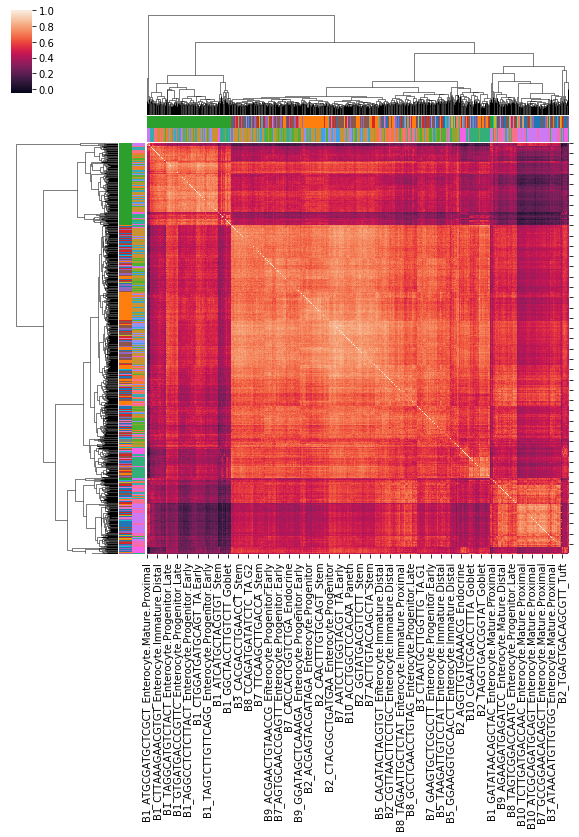

In [246]:
g = sns.clustermap(correlation_subset, row_colors = [batch_colors, cell_colors], 
                   col_colors = [batch_colors, cell_colors])
ax = g.ax_heatmap
ax.set_yticklabels("")
ax.set_yticklabels("")

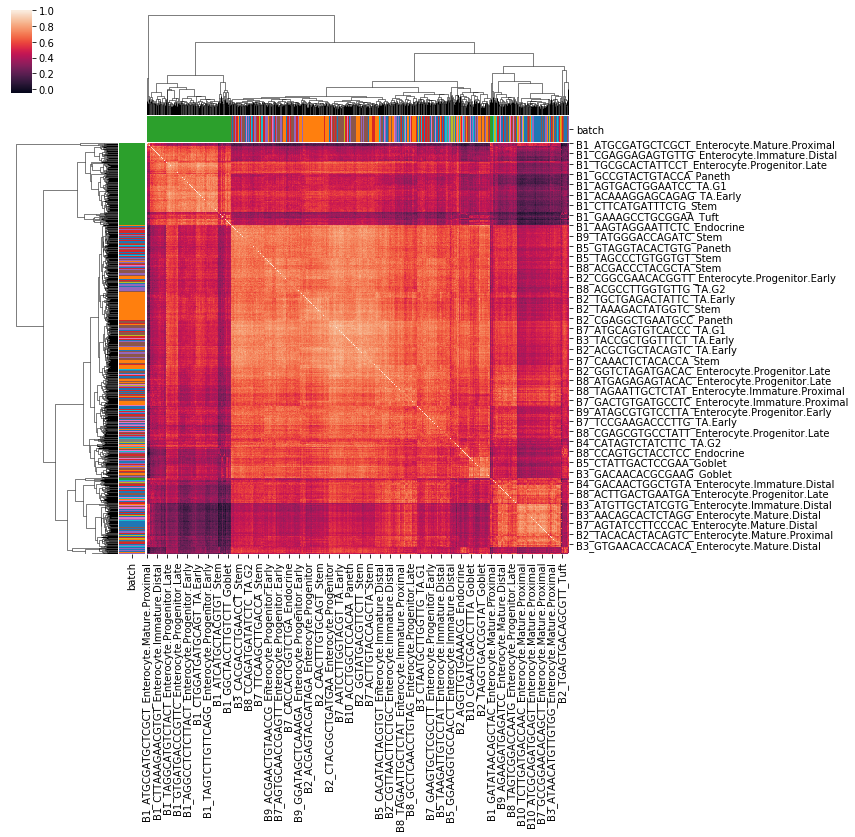

In [247]:
sns.clustermap(correlation_subset, row_colors = batch_colors, 
               col_colors = batch_colors)


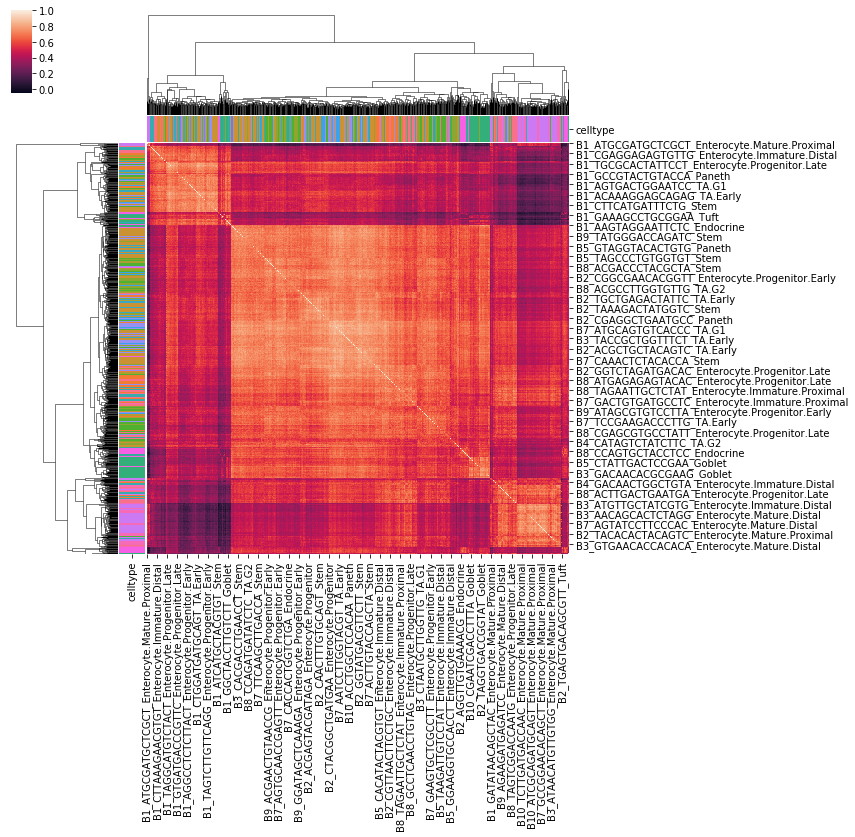

In [248]:
sns.clustermap(correlation_subset, row_colors = cell_colors, 
               col_colors = cell_colors)

In [249]:
def make_clustermap(correlation_df, num_subset):
    
    cols_to_keep = random.sample(range(len(correlation_df)), num_subset)
    cells_subset = correlation_df.columns[cols_to_keep]
    correlation_subset = correlation_df[cells_subset]
    correlation_subset = correlation_subset.T[cells_subset]
    
    get_batch = correlation_subset.reset_index()
    get_batch['batch'] = get_batch['index'].apply(lambda x: x.split("_")[0])

    #also get celltype identifier
    get_batch['celltype'] = get_batch['index'].apply(lambda x: x.split("_")[2])

    get_batch.set_index('index', inplace=True)
    
    batches = get_batch['batch']
    celltypes = get_batch['celltype']
    
    batch_palette = sns.color_palette(n_colors = len(batches.unique()))
    cell_type_palette = sns.color_palette('husl', n_colors = len(celltypes.unique()))
    
    batch_color_assignment = dict(zip(batches.unique(), batch_palette))
    batch_colors = batches.map(batch_color_assignment)
    
    
    cell_color_assignment = dict(zip(celltypes.unique(), cell_type_palette))
    cell_colors = celltypes.map(cell_color_assignment)
    
    sns.clustermap(correlation_subset, row_colors = [batch_colors, cell_colors], 
               col_colors = [batch_colors, cell_colors])
    plt.show()
    


In [250]:
corr_df = pd.read_csv(data_dir+"log2_tpm_vg_0.05_zscore_corr.csv", index_col=0)

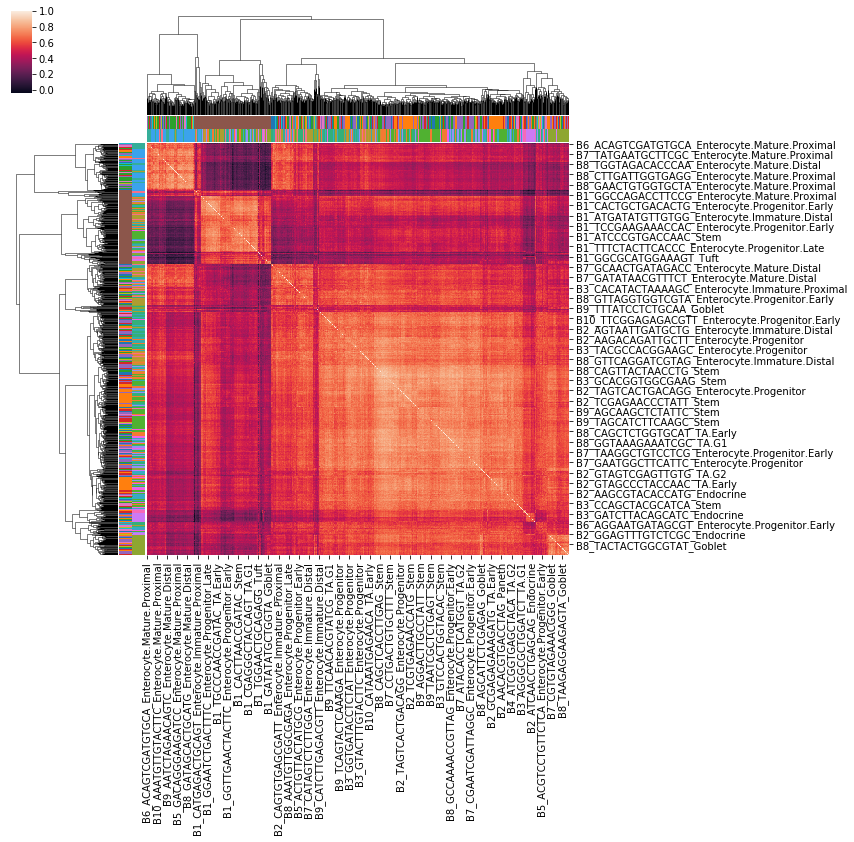

In [251]:
make_clustermap(corr_df, 1000)